Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [4]:
# imports and setup
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

In [5]:

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


In [6]:
X

array([[-0.3037564 ,  0.27194296, -1.2984626 , ..., -0.22927702,
         0.60290063,  0.2063805 ],
       [-0.20053269, -0.30437116, -0.97295527, ..., -0.12643629,
         1.27256776, -0.06419889],
       [ 1.35097255,  0.93048323, -0.43242865, ..., -0.45356427,
         1.06455736, -1.02736984],
       ...,
       [-1.45953712, -1.64844822,  1.8947674 , ...,  1.30241496,
        -1.92201715,  0.78623258],
       [-0.5009657 ,  0.16483753, -1.07666519, ..., -0.55959232,
         1.78642312,  0.35648516],
       [ 0.71776702,  1.26195986, -0.0965376 , ..., -1.2768736 ,
        -0.5557099 ,  1.08032666]])

# Find ("optimal") number of clusters k first

method1
[Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

[np.float64(0.4150097488925307), np.float64(0.5155238155989122), np.float64(0.6265345233835395), np.float64(0.6611375445369994), np.float64(0.5459710483055447), np.float64(0.4509247059520141), np.float64(0.35252777761527054), np.float64(0.34863797052141854)]


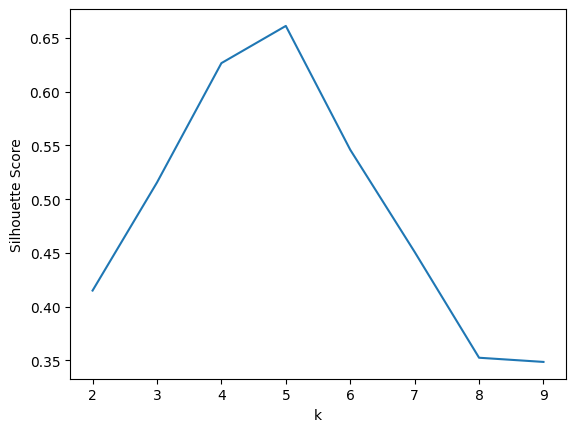

In [7]:
#
#2
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters_k = [2, 3, 4, 5,6,7,8,9]
silhouette_avg_k = []


for n_clusters_k in range_n_clusters_k:
    clusterer_k = KMeans(n_clusters=n_clusters_k, random_state=10)
    cluster_labels_k = clusterer_k.fit_predict(X)
    silhouette_avg_k.append(silhouette_score(X, cluster_labels_k))

print(silhouette_avg_k)
plt.plot(range_n_clusters_k,silhouette_avg_k)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

method 2 inertia value (only check total intra-cluster distance)

so yes k=5 best

>0.7 means the clusters are seperatelly.So, okay silhouette_score

[6504.839875872424, 3836.3771369424576, 1780.4172638655577, 924.3159961688092, 892.6443542470599, 862.5921665100362, 823.7100949928089, 807.3096971848739]


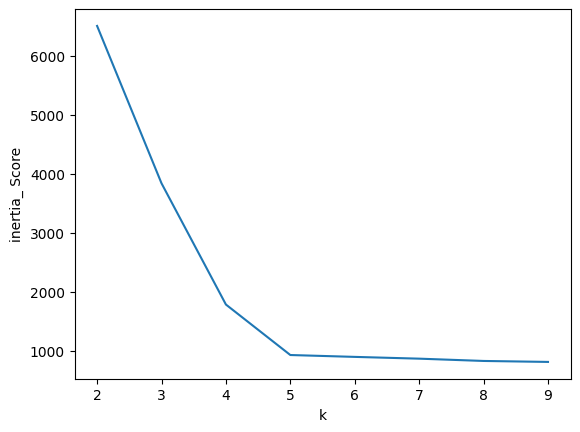

In [8]:

inertia_1 = []


for n_clusters_k in range_n_clusters_k:
    clusterer_k_2 = KMeans(n_clusters=n_clusters_k, random_state=10)
    cluster_labels_k = clusterer_k_2.fit_predict(X)
    inertia_1.append(clusterer_k_2.inertia_)

print(inertia_1)
plt.plot(range_n_clusters_k,inertia_1)
plt.xlabel('k')
plt.ylabel('inertia_ Score')
plt.show()

Also, k=5

In k-means, inertia value (sum of within-cluster sum of squares) is affected by init method (k-means++ gives better starting centroids), n_init (number of runs), and max_iter (convergence steps). max_iter=1 risks poor clustering.
Note:
Defaults in scikit-lear's KMeans:

init="k-means++" (better centroid seeds, avoids poor clustering).

n_init=10 (run algorithm 10 times, keep best inertia).

max_iter=300 (allow up to 300 updates per run).

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here